In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
def normalised_true_range(row):
    try:
        return max(row[0] - row[1], abs(row[0] - row[2]), abs(row[1] - row[2])) / row[2]
    except RuntimeError:
        return np.nan()

**Read the data**

In [3]:
etf = pd.read_csv('../resources/all_etfs2_no_vol.csv', index_col = 0, parse_dates=True)

In [4]:
snp = pd.read_csv("../resources/all_snp2_no_vol.csv",index_col = 0, parse_dates=True)

**Organise the data and add intraday volatility**

In [44]:
etf['HII']

Features,CLOSE,HIGH,LOW,OPEN,VOLUME,INTRADAY VOLATILITY
Date,,,,,,
2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-12-24,252.799560,256.640015,253.440002,256.149994,92500.0,0.015192
2019-12-26,251.416077,254.789993,251.279999,254.149994,144900.0,0.013961
2019-12-27,249.893250,253.850006,250.869995,253.399994,149100.0,0.015834


In [6]:
read_snp_columns = [re.findall(r"(\w+)", col) for col in snp.columns]

snp_tickers = [r[0].upper() for r in read_snp_columns]

snp_features = [r[-1].upper() for r in read_snp_columns]

snp.columns = pd.MultiIndex.from_tuples(tuples = zip(snp_tickers,snp_features),names = ['Tickers','Features'])

snp = pd.DataFrame.fillna(snp,method = 'ffill')

In [7]:
read_etf_columns = [re.findall(r"(\w+)", col) for col in etf.columns]

etf_tickers = [r[0].upper() for r in read_etf_columns]

etf_features = [r[-1].upper() for r in read_etf_columns]

etf.columns = pd.MultiIndex.from_tuples(tuples = zip(etf_tickers,etf_features),names = ['Tickers','Features'])

etf = pd.DataFrame.fillna(etf,method = 'ffill')

In [8]:
all_tickers = {'ETF':set(etf_tickers),'SNP':set(snp_tickers)}

In [9]:
for ticker in all_tickers['ETF']:
    etf.loc[:,pd.IndexSlice[ticker,'INTRADAY VOLATILITY']] = \
    np.apply_along_axis(normalised_true_range, axis = 1, arr = etf[ticker][['HIGH','LOW','CLOSE']])

KeyboardInterrupt: 

In [ ]:
for ticker in all_tickers['SNP']:
    snp.loc[:,pd.IndexSlice[ticker,'INTRADAY VOLATILITY']] = \
    np.apply_along_axis(normalised_true_range, axis = 1, arr = snp[ticker][['HIGH','LOW','CLOSE']])


In [ ]:
snp = snp[snp.columns.sort_values()]
etf = etf[etf.columns.sort_values()]

In [ ]:
all_data_dict = {'SNP':snp,'ETF':etf}

In [ ]:
df_all_data = pd.concat([snp,etf],axis = 1)
# a very clunky way of creating a MultiIndex
df_all_data.columns = pd.MultiIndex.from_tuples(zip(['SNP']*snp.shape[-1]+['ETF']*etf.shape[-1],
                              df_all_data.columns.get_level_values(0),
                              df_all_data.columns.get_level_values(1)),
                          names = ['Type','Tickers','Features'])

In [15]:
all_tickers.keys()

dict_keys(['ETF', 'SNP'])

Type              SNP                                                       \
Tickers             A                                                        
Features        CLOSE       HIGH INTRADAY VOLATILITY        LOW       OPEN   
Date                                                                         
2008-01-02  22.499743  24.792561            0.101904  24.155937  24.320457   
2008-01-04  20.168808  22.160229            0.098738  21.394850  21.394850   
2008-01-05  20.305916  22.281832            0.097307  21.380543  21.602289   
2008-01-07  23.224491  25.586552            0.101706  24.985693  25.064377   
2008-01-08  23.413843  25.944206            0.108071  25.221745  25.851215   
...               ...        ...                 ...        ...        ...   
2008-03-26  19.581173  21.638054            0.105044  21.387697  21.602289   
2008-03-27  19.078426  21.487841            0.126290  20.894135  21.459227   
2008-03-28  19.313480  21.273247            0.101471  20.958511 

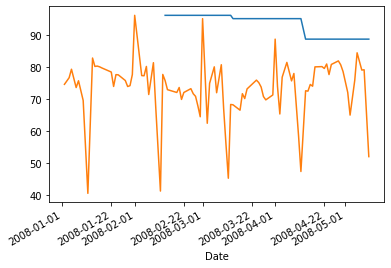

In [26]:
window['SNP']['AMZN']['CLOSE'].rolling(window = 30).max().plot()
window['SNP']['AMZN']['CLOSE'].plot()

In [6]:
from datetime import date

In [56]:
df.drop(pd.IndexSlice['ETF','HII'], axis =1, inplace = True )

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [57]:
df.columns

MultiIndex([('SNP',    'A',               'CLOSE'),
            ('SNP',    'A',                'HIGH'),
            ('SNP',    'A', 'INTRADAY VOLATILITY'),
            ('SNP',    'A',                 'LOW'),
            ('SNP',    'A',                'OPEN'),
            ('SNP',    'A',              'VOLUME'),
            ('SNP',  'AAL',               'CLOSE'),
            ('SNP',  'AAL',                'HIGH'),
            ('SNP',  'AAL', 'INTRADAY VOLATILITY'),
            ('SNP',  'AAL',                 'LOW'),
            ...
            ('ETF',  'ZIG', 'INTRADAY VOLATILITY'),
            ('ETF',  'ZIG',                 'LOW'),
            ('ETF',  'ZIG',                'OPEN'),
            ('ETF',  'ZIG',              'VOLUME'),
            ('ETF', 'ZMLP',               'CLOSE'),
            ('ETF', 'ZMLP',                'HIGH'),
            ('ETF', 'ZMLP', 'INTRADAY VOLATILITY'),
            ('ETF', 'ZMLP',                 'LOW'),
            ('ETF', 'ZMLP',                'OPEN

In [58]:
df_all_data = df
df_all_data.to_csv(r'../resources/all_data.csv')

In [3]:
df = pd.read_csv('../resources/all_data.csv', header = [0,1,2], index_col = 0 , parse_dates=True)

In [7]:
df.index==date(2008,1,1)

array([False, False, False, ..., False, False, False])

In [9]:
cointegrated_pairs = [('AEE','SO'),('FE','TXT'),('MET','AMT'),('FE','WY'),('DIS','CE'),('ATVI', 'LDOS'), ('FE', 'DLR'),('DIS','GPN'),('APA','XLNX'),('FE','AIZ'),('MET','MCD'),('FIS','CHD'),('FIS','CAH'),('DIS','SEE')]
set_of_pairs = set()
for x in cointegrated_pairs:
    set_of_pairs.add(x[0])
    set_of_pairs.add(x[1])

    


In [18]:
.to_csv(r'../resources/cointegrated_pairs_data.csv')

In [24]:
df_cointegrated = df['SNP'][list(set_of_pairs)].iloc[:252]

In [30]:
df_cointegrated.to_csv(r'../resources/cointegrated_pairs_data.csv')

In [10]:
df = pd.read_csv('../resources/all_data.csv', header = [0,1,2], index_col = 0 , parse_dates=True)

In [12]:
idx = pd.IndexSlice

In [16]:
df.loc[:,pd.IndexSlice['SNP',:,['CLOSE','OPEN']]]

Type              SNP                                               \
Tickers             A                   AAL                    AAP   
Features        CLOSE       OPEN      CLOSE       OPEN       CLOSE   
Date                                                                 
2008-01-02  22.499743  24.320457  14.508792  13.980000   35.043106   
2008-01-04  20.168808  21.394850   9.078600   9.200000   34.212654   
2008-01-05  20.305916  21.602289   8.814632   8.650000   34.693981   
2008-01-07  23.224491  25.064377   2.272007   2.460000   37.665653   
2008-01-08  23.413843  25.851215   4.864545   5.300000   40.490330   
...               ...        ...        ...        ...         ...   
2019-12-24  84.904182  85.449997  29.072563  29.320000  160.117645   
2019-12-26  85.053474  85.309998  29.560759  29.320000  158.821304   
2019-12-27  85.023621  85.680000  28.335287  29.760000  157.903900   
2019-12-30  84.684486  85.339996  28.195801  28.500000  158.671722   
2019-12-31  85.093445  84.839996  28.574404  28.200001  159.708801   

Type                                                                  ...  \
Tickers                       AAPL                   ABBV             ...   
Features          OPEN       CLOSE        OPEN      CLOSE       OPEN  ...   
Date                                                                  ...   
2008-01-02   36.160000   16.585785   19.462856        NaN        NaN  ...   
2008-01-04   35.029999   18.542591   20.900000        NaN        NaN  ...   
2008-01-05   34.750000   22.321053   24.994286        NaN        NaN  ...   
2008-01-07   38.320000   21.661335   23.461428        NaN        NaN  ...   
2008-01-08   41.529999   19.426752   22.842857        NaN        NaN  ...   
...                ...         ...         ...        ...        ...  ...   
2019-12-24  160.119995  283.596924  284.690002  88.652267  90.400002  ...   
2019-12-26  160.529999  289.223602  284.820007  88.632538  90.199997  ...   
2019-12-27  159.470001  289.113831  291.119995  88.010933  89.980003  ...   
2019-12-30  158.350006  290.829773  289.459992  87.339996  89.220001  ...   
2019-12-31  159.160004  292.954712  289.929993  87.359734  88.209999  ...   

Type                                                                    \
Tickers            YUM                     ZBH                    ZBRA   
Features         CLOSE        OPEN       CLOSE        OPEN       CLOSE   
Date                                                                     
2008-01-02   18.508062   24.593817   73.619713   78.129997   31.889999   
2008-01-04   20.304260   26.757729   73.805664   78.650002   34.529999   
2008-01-05   21.539541   28.763479   70.030754   73.860001   37.669998   
2008-01-07   18.714428   24.989216   62.927269   67.370003   32.230000   
2008-01-08   18.804262   25.930985   64.210350   68.879997   30.200001   
...                ...         ...         ...         ...         ...   
2019-12-24   99.882355   99.739998  150.256638  151.190002  254.330002   
2019-12-26  101.335838  100.610001  149.927475  150.779999  254.419998   
2019-12-27  101.445351  101.839996  149.638184  150.580002  256.000000   
2019-12-30  100.190964  101.639999  148.381302  150.149994  254.110001   
2019-12-31  100.280571  100.669998  149.308990  148.289993  255.440002   

Type                                                                  
Tickers                      ZION                    ZTS              
Features          OPEN      CLOSE       OPEN       CLOSE        OPEN  
Date                                                                  
2008-01-02   30.730000  47.941280  56.369999         NaN         NaN  
2008-01-04   33.560001  42.494209  46.180000         NaN         NaN  
2008-01-05   36.759998  43.070335  46.830002         NaN         NaN  
2008-01-07   32.500000  28.576622  31.049999         NaN         NaN  
2008-01-08   30.770000  26.938637  30.780001         NaN         NaN  
...                ...        ...        ..

In [29]:
df.loc[:,pd.IndexSlice[:,:]]

Type              SNP                                                       \
Tickers             A                                                        
Features        CLOSE       HIGH INTRADAY VOLATILITY        LOW       OPEN   
Date                                                                         
2008-01-02  22.499743  24.792561            0.101904  24.155937  24.320457   
2008-01-04  20.168808  22.160229            0.098738  21.394850  21.394850   
2008-01-05  20.305916  22.281832            0.097307  21.380543  21.602289   
2008-01-07  23.224491  25.586552            0.101706  24.985693  25.064377   
2008-01-08  23.413843  25.944206            0.108071  25.221745  25.851215   
...               ...        ...                 ...        ...        ...   
2019-12-24  84.904182  85.449997            0.006429  84.980003  85.449997   
2019-12-26  85.053474  85.639999            0.006896  85.089996  85.309998   
2019-12-27  85.023621  85.680000            0.007720  85.110001  85.680000   
2019-12-30  84.684486  85.400002            0.008975  84.639999  85.339996   
2019-12-31  85.093445  85.339996            0.007874  84.669998  84.839996   

Type                                                                        \
Tickers                      AAL                                             
Features       VOLUME      CLOSE       HIGH INTRADAY VOLATILITY        LOW   
Date                                                                         
2008-01-02  8779100.0  14.508792  15.550000            0.148186  13.400000   
2008-01-04  3152400.0   9.078600   9.810000            0.080563   9.200000   
2008-01-05  4509500.0   8.814632   9.620000            0.110044   8.650000   
2008-01-07  4520700.0   2.272007   2.490000            0.096831   2.270000   
2008-01-08  3477900.0   4.864545   5.470000            0.162400   4.680000   
...               ...        ...        ...                 ...        ...   
2019-12-24   271900.0  29.072563  29.430000            0.012295  29.100000   
2019-12-26   649100.0  29.560759  29.709999            0.015223  29.260000   
2019-12-27   767700.0  28.335287  29.809999            0.052045  28.360001   
2019-12-30   742800.0  28.195801  28.530001            0.016315  28.070000   
2019-12-31  1176200.0  28.574404  28.790001            0.020998  28.190001   

Type        ...                 ETF                                            \
Tickers     ...                 ZIG                                      ZMLP   
Features    ... INTRADAY VOLATILITY        LOW       OPEN   VOLUME      CLOSE   
Date        ...                                                                 
2008-01-02  ...                 NaN        NaN        NaN      NaN        NaN   
2008-01-04  ...                 NaN        NaN        NaN      NaN        NaN   
2008-01-05  ...                 NaN        NaN        NaN      NaN        NaN   
2008-01-07  ...                 NaN        NaN        NaN      NaN        NaN   
2008-01-08  ...                 NaN        NaN        NaN      NaN        NaN   
...         ...                 ...        ...        ...      ...        ...   
2019-12-24  ...            0.005648  27.445000  27.600000   3300.0  11.209663   
2019-12-26  ...            0.004040  27.429001  27.540001   3400.0  11.405505   
2019-12-27  ...            0.007857  27.365000  27.580000   4700.0  11.256292   
2019-12-30  ...            0.004241  27.344999  27.360001  16800.0  11.125731   
2019-12-31  ...            0.002887  27.320000  27.320000  21300.0  11.172359   

Type                                                          
Tickers                                                       
Features     HIGH INTRADAY VOLATILITY    LOW   OPEN   VOLUME  
Date                                                          
2008-01-02    NaN                 NaN    NaN    NaN      NaN  
2008-01-04    NaN                 NaN    NaN    NaN      NaN  
2008-01-05    NaN                 NaN    NaN    NaN      NaN  
2

In [ ]:
df

In [30]:
from collections import Counter

In [40]:
small_df

HII


In [101]:
small_df = df.iloc[:500]
s =set([i[1] for i in small_df.columns])
s_after = set()
for ticker in s:
    columns = small_df.loc[:,pd.IndexSlice[:,ticker]]
    if any(columns.isna().sum().values):
        s_after.add(ticker)

In [115]:
any(df.loc[:,pd.IndexSlice[:,'HPE']].isna().sum())

True

In [119]:
import datetime

In [104]:
df['ETF'][s_after]

Tickers          SRVR                                                       \
Features        CLOSE       HIGH INTRADAY VOLATILITY        LOW       OPEN   
Date                                                                         
2008-01-02        NaN        NaN                 NaN        NaN        NaN   
2008-01-04        NaN        NaN                 NaN        NaN        NaN   
2008-01-05        NaN        NaN                 NaN        NaN        NaN   
2008-01-07        NaN        NaN                 NaN        NaN        NaN   
2008-01-08        NaN        NaN                 NaN        NaN        NaN   
...               ...        ...                 ...        ...        ...   
2019-12-24  32.047974  32.340000            0.009112  32.105000  32.279999   
2019-12-26  32.216957  32.410000            0.005992  32.240002  32.349998   
2019-12-27  32.296482  32.549999            0.007850  32.299999  32.549999   
2019-12-30  32.256722  32.450001            0.008246  32.183998  32.419998   
2019-12-31  32.385948  32.660000            0.008462  32.400002  32.450001   

Tickers                    PSR                                            ...  \
Features     VOLUME      CLOSE       HIGH INTRADAY VOLATILITY        LOW  ...   
Date                                                                      ...   
2008-01-02      NaN        NaN        NaN                 NaN        NaN  ...   
2008-01-04      NaN        NaN        NaN                 NaN        NaN  ...   
2008-01-05      NaN        NaN        NaN                 NaN        NaN  ...   
2008-01-07      NaN        NaN        NaN                 NaN        NaN  ...   
2008-01-08      NaN        NaN        NaN                 NaN        NaN  ...   
...             ...        ...        ...                 ...        ...  ...   
2019-12-24  81000.0  93.040443  94.290001            0.013430  93.839996  ...   
2019-12-26  41200.0  93.515045  94.580002            0.011388  94.099998  ...   
2019-12-27  27300.0  93.930313  95.000000            0.011388  94.559998  ...   
2019-12-30  63500.0  93.930313  95.070000            0.012133  94.599998  ...   
2019-12-31  45600.0  94.681755  95.760002            0.011388  94.989998  ...   

Tickers                   PNQI                                        IZRL  \
Features   INTRADAY VOLATILITY         LOW        OPEN   VOLUME      CLOSE   
Date                                                                         
2008-01-02                 NaN         NaN         NaN      NaN        NaN   
2008-01-04                 NaN         NaN         NaN      NaN        NaN   
2008-01-05                 NaN         NaN         NaN      NaN        NaN   
2008-01-07            0.019026   22.219999   22.360001   7400.0        NaN   
2008-01-08            0.015481   21.760000   22.100000   6600.0        NaN   
...                        ...         ...         ...      ...        ...   
2019-12-24            0.002391  142.160004  142.369995   9200.0  22.293005   
2019-12-26            0.008919  142.410004  142.410004  20900.0  22.434999   
2019-12-27            0.009635  142.910004  144.000000  23500.0  22.375000   
2019-12-30            0.014503  141.289993  143.339996  20200.0  22.120001   
2019-12-31            0.006859  140.580002  140.580002  28400.0  22.129999   

Tickers                                                                  
Features         HIGH INTRADAY VOLATILITY        LOW       OPEN  VOLUME  
Date                                                                     
2008-01-02        NaN                 NaN        NaN        NaN     NaN  
2008-01-04        NaN                 NaN        NaN        NaN     NaN  
2008-01-05        NaN                 NaN        NaN        NaN     NaN  
2008-01-07        NaN                 NaN        NaN        NaN     NaN  
2008-01-08        NaN                 NaN        NaN        NaN     NaN  
...               ...                 ...        ...        ...     ...  
2019-12-24  2

In [90]:
small_df.loc[:,pd.IndexSlice[:,'ACES']]

Type         ETF                                         
Tickers     ACES                                         
Features   CLOSE HIGH INTRADAY VOLATILITY LOW OPEN VOLUME
Date                                                     
2008-01-02   NaN  NaN                 NaN NaN  NaN    NaN
2008-01-04   NaN  NaN                 NaN NaN  NaN    NaN
2008-01-05   NaN  NaN                 NaN NaN  NaN    NaN
2008-01-07   NaN  NaN                 NaN NaN  NaN    NaN
2008-01-08   NaN  NaN                 NaN NaN  NaN    NaN
...          ...  ...                 ...  ..  ...    ...
2009-12-17   NaN  NaN                 NaN NaN  NaN    NaN
2009-12-18   NaN  NaN                 NaN NaN  NaN    NaN
2009-12-21   NaN  NaN                 NaN NaN  NaN    NaN
2009-12-22   NaN  NaN                 NaN NaN  NaN    NaN
2009-12-23   NaN  NaN                 NaN NaN  NaN    NaN

[500 rows x 6 columns]